# Time series Analysis

## Importing data from yahoo finance

In [1]:
#pip install yFinance

In [2]:
# STOCHASTICS OSCILATOR
import yfinance as yf
from ta.momentum import StochasticOscillator

# Fetch the data for a stock
stock = yf.download("EURUSD=X", start="2022-01-01", end="2022-12-31")
stock

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,1.137385,1.137592,1.128541,1.137346,1.137346,0
2022-01-04,1.130199,1.132300,1.127345,1.130224,1.130224,0
2022-01-05,1.128541,1.134559,1.127764,1.128363,1.128363,0
2022-01-06,1.131222,1.133067,1.128554,1.131350,1.131350,0
2022-01-07,1.129586,1.135976,1.129050,1.129688,1.129688,0
...,...,...,...,...,...,...
2022-12-26,1.066780,1.063717,1.060895,1.066780,1.066780,0
2022-12-27,1.064022,1.066900,1.061244,1.064022,1.064022,0
2022-12-28,1.063717,1.067430,1.061391,1.063717,1.063717,0


In [33]:
# saving the data to excell
#stock.to_excel('eurusd.xlsx', index=True)

### Data exploration

In [25]:
# Get information about the DataFrame
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2022-01-03 to 2022-12-30
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       260 non-null    float64
 1   High       260 non-null    float64
 2   Low        260 non-null    float64
 3   Close      260 non-null    float64
 4   Adj Close  260 non-null    float64
 5   Volume     260 non-null    int64  
 6   %K         251 non-null    float64
 7   %D         249 non-null    float64
 8   Date       260 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 20.3 KB


### summary statistics of the DataFrame

In [26]:
# Display the summary statistics of the DataFrame
stock.describe()

,Open,High,Low,Close,Adj Close,Volume,%K,%D,Date
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.0,251.000000,249.000000,260.000000
mean,1.053652,1.058114,1.049076,1.053654,1.053654,0.0,47.017222,46.816530,19175.500000
std,0.050039,0.049336,0.050507,0.050044,0.050044,0.0,26.309808,23.088435,105.270473
min,0.959619,0.967006,0.954016,0.959619,0.959619,0.0,4.239191,9.293808,18995.000000
25%,1.012956,1.019017,1.007598,1.012956,1.012956,0.0,23.876651,26.459887,19085.250000
50%,1.052598,1.056842,1.048900,1.052598,1.052598,0.0,46.181280,45.049161,19175.500000
75%,1.090224,1.094983,1.087930,1.090028,1.090028,0.0,68.607644,67.807026,19265.750000
max,1.145659,1.149425,1.143641,1.145712,1.145712,0.0,99.237809,91.258425,19356.000000


### Plots 

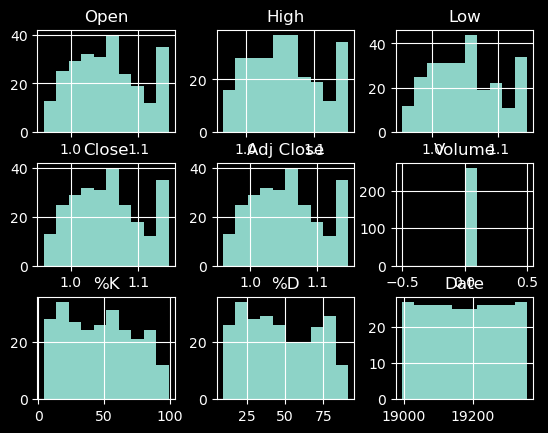

In [27]:
import matplotlib.pyplot as plt
# Create a histogram
stock.hist()
plt.show()

### Line Chart and stochastics indicator

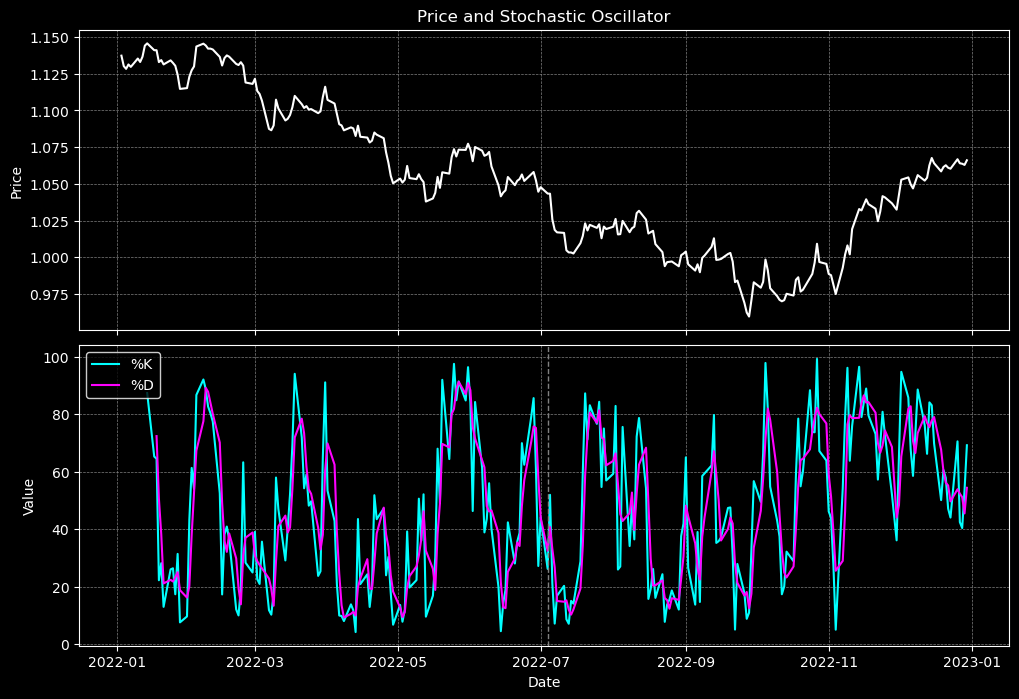

In [6]:
import matplotlib.pyplot as plt

# Set style to 'darkgrid' for a darker background
plt.style.use('dark_background')

# Create subplots with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot the price data in the first subplot
ax1.plot(stock['Close'], label='Price', color='white')

# Add gridlines to the first subplot
ax1.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Add labels and title to the first subplot
ax1.set_ylabel('Price', color='white')
ax1.set_title('Price and Stochastic Oscillator', color='white')

# Plot the %K and %D values of the Stochastic Oscillator in the second subplot
ax2.plot(stock['%K'], label='%K', color='cyan')
ax2.plot(stock['%D'], label='%D', color='magenta')

# Add gridlines to the second subplot
ax2.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Add labels and legend to the second subplot
ax2.set_xlabel('Date', color='white')
ax2.set_ylabel('Value', color='white')
ax2.legend(frameon=True, facecolor='black', edgecolor='white', loc='upper left')

# Add a vertical line to separate the two subplots
plt.axvline(x=stock.index[stock.shape[0]//2], color='gray', linestyle='--', linewidth=1)

# Set the background color of both subplots
ax1.set_facecolor('black')
ax2.set_facecolor('black')

# Customize the tick parameters
ax1.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.05)

# Show the plot
plt.show()


In [7]:
#pip install mplfinance

### Candlestick Chart

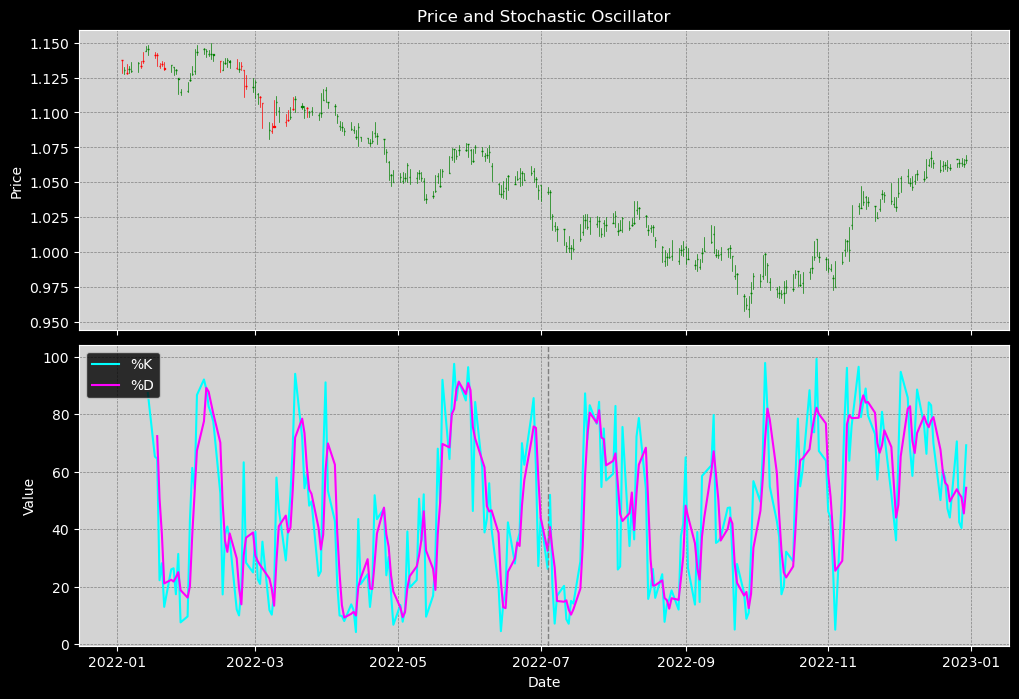

In [8]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import date2num

# Convert the index (date) to numeric representation
stock['Date'] = stock.index.map(date2num)

# Create subplots with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot the candlestick chart in the first subplot
candlestick_ohlc(ax1, stock[['Date', 'Open', 'High', 'Low', 'Close']].values, width=0.6, colorup='g', colordown='r')

# Add gridlines to the first subplot
ax1.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Add labels and title to the first subplot
ax1.set_ylabel('Price')
ax1.set_title('Price and Stochastic Oscillator')

# Plot the %K and %D values of the Stochastic Oscillator in the second subplot
ax2.plot(stock.index, stock['%K'], label='%K', color='cyan')
ax2.plot(stock.index, stock['%D'], label='%D', color='magenta')

# Add gridlines to the second subplot
ax2.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Add labels and legend to the second subplot
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.legend(frameon=True, loc='upper left')

# Add a vertical line to separate the two subplots
plt.axvline(x=stock.index[stock.shape[0] // 2], color='gray', linestyle='--', linewidth=1)

# Set the background color of both subplots
ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')

# Customize the tick parameters
ax1.tick_params(axis='y')
ax2.tick_params(axis='x')
ax2.tick_params(axis='y')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.05)

# Show the plot
plt.show()


## Correlation

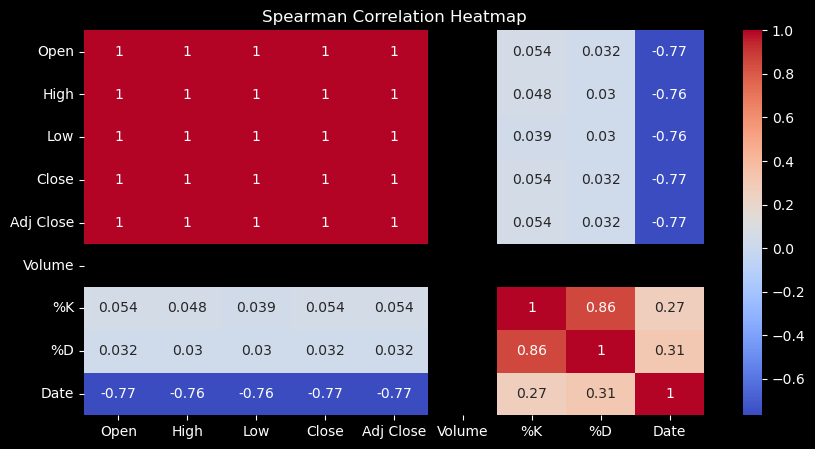

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'data'
correlation_matrix = stock.corr(method='spearman')

# Create a correlation heatmap using seaborn
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation Heatmap")
plt.show()


### Multiple Linear Regression

In [31]:
# multiple linear regression
from sklearn.linear_model import LinearRegression

# Specify the predictor variables
X = stock[['Open', 'High', 'Low', 'Adj Close', 'Volume']]

# Specify the target variable
y = stock['Close']

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the regression coefficients
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [-4.79155426e-16 -9.51610256e-16 -7.32905493e-17  1.00000000e+00
  0.00000000e+00]
Intercept: 1.5543122344752192e-15


In [29]:
stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '%K', '%D',
       'Date'],
      dtype='object')

# Autoarima

In [10]:
from pmdarima import auto_arima
# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
df = pd.DataFrame(stock['Close'])
df

,Close
Date,
2022-01-03,1.137346
2022-01-04,1.130224
2022-01-05,1.128363
2022-01-06,1.131350
2022-01-07,1.129688
...,...
2022-12-26,1.066780
2022-12-27,1.064022
2022-12-28,1.063717


### Split data into training and test sets

In [18]:
# Split data into training and test sets
train_data = df.iloc[:-5]
test_data = df.iloc[-5:]
train_data.shape

(255, 1)

### Runing a loop to get the best pdq values

In [19]:
# Runing a loop to get the best pdq values
stepwise_fit = auto_arima(train_data, trace=True,d=1, 
          suppress_warnings=True,information_criterion='aic')
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1838.741, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1838.981, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1839.366, Time=0.51 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1839.582, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1840.417, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1837.722, Time=0.40 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.738 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  255
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 921.208
Date:                Sat, 10 Jun 2023   AIC                          -1840.417
Time:                        17:42:07   BIC                          -1836.879
Sample:                    01-03-2022   HQIC                         -1838.993
                         - 12-23-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.137e-05   3.51e-06     11.794      0.000    3.45e-05    4.82e-05
===================================================================================
Ljung-Box (L1) (Q):                   2.40   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.12   Prob(JB):                         0.64
Heteroskedasticity (H):               1.58   Skew:                             0.10
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###  Fit the ARIMA model

In [21]:
# Fit the ARIMA model
model = ARIMA(train_data, order=(0, 1, 0))
model = model.fit()

# Generate forecasts for the test set
forecast_values = model.predict(start=test_data.index[0], end=test_data.index[-1])

### forecast_values

In [22]:
forecast_values

2022-12-26    1.060333
2022-12-27    1.060333
2022-12-28    1.060333
2022-12-29    1.060333
2022-12-30    1.060333
Freq: B, Name: predicted_mean, dtype: float64

### Actual and forecast plot

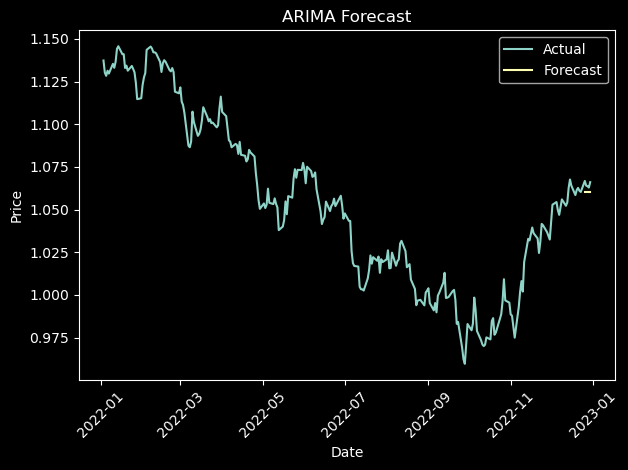

In [23]:
plt.plot(df.index, df['Close'], label='Actual')
plt.plot(forecast_values.index, forecast_values, label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Evaluating the model

In [24]:
# Evaluate the model
mae = mean_absolute_error(test_data['Close'], forecast_values)
mse = mean_squared_error(test_data['Close'], forecast_values)
rmse = np.sqrt(mse)

print("Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Evaluation Metrics:
Mean Absolute Error (MAE): 0.004370927810668945
Mean Squared Error (MSE): 2.1264287187250375e-05
Root Mean Squared Error (RMSE): 0.00461132163129513


### Run the ARIMA model with values of 10 for p,d,q, store the MAE values for each order, pick the best 5 orders, and print the forecast and plots for those orders:

In [ ]:
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define the range of values for each parameter
p_values = range(11)  # Range of values for p parameter (0 to 10)
d_values = range(11)  # Range of values for d parameter (0 to 10)
q_values = range(11)  # Range of values for q parameter (0 to 10)

mae_dict = {}

# Iterate over each order combination
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)

            # Fit the ARIMA model
            model = ARIMA(train_data, order=order)
            model = model.fit()

            # Generate forecasts for the test set
            forecast_values = model.predict(start=test_data.index[0], end=test_data.index[-1])

            # Evaluate the model
            mae = mean_absolute_error(test_data['Close'], forecast_values)

            # Store MAE for the current order
            mae_dict[order] = mae

# Sort the MAE values and pick the top 5 orders
best_orders = sorted(mae_dict, key=mae_dict.get)[:5]

# Iterate over the best orders
for order in best_orders:
    # Fit the ARIMA model with the best order
    model = ARIMA(train_data, order=order)
    model = model.fit()

    # Generate forecasts for the test set using the best model
    forecast_values = model.predict(start=test_data.index[0], end=test_data.index[-1])

    # Evaluate the best model
    mae = mean_absolute_error(test_data['Close'], forecast_values)
    mse = mean_squared_error(test_data['Close'], forecast_values)
    rmse = np.sqrt(mse)

    print("Order:", order)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)

    # Plot actual data and forecasts
    plt.plot(df.index, df['Close'], label='Actual')
    plt.plot(forecast_values.index, forecast_values, label='Forecast')
    plt.title(f"ARIMA Forecast - Order {order}")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
